# My Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import datetime as dt

# Data Wrangling

In [2]:
df=pd.read_excel('D:/sql/Data set/Retail/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Data Preparing

## changing all 0 unit price to the mode price for every category

In [3]:
zero_G=df.loc[(df['UnitPrice']==0)&(df['CustomerID'].notnull()==True),['Description']]

In [4]:
a=list(zero_G['Description'])

In [5]:
for i in a:
    
    description_match = df['Description'] == i
    mode_price = df[description_match]['UnitPrice'].mode().iloc[0]
    df.loc[description_match & (df['UnitPrice'] == 0), 'UnitPrice'] = mode_price

## adding total price column

In [6]:
df['TotalPrice']=df['UnitPrice']*df['Quantity']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   TotalPrice   541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


# Data Cleaning

## Removing non customer & cancelled transactions

In [8]:
df2=df.loc[(df['Quantity']>0)&(df['CustomerID'].notnull()==True)]

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   TotalPrice   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [10]:
pd.DataFrame(df2.apply(lambda col: len(col.unique())),columns=["Unique Values Count"])

,Unique Values Count
InvoiceNo,18536
StockCode,3665
Description,3877
Quantity,302
InvoiceDate,17286
UnitPrice,440
CustomerID,4339
Country,37
TotalPrice,2940


## droping unimportant feature

In [11]:
df2.drop(['InvoiceNo','Description'],axis=1,inplace=True)

In [12]:
df2['StockCode'] = df2['StockCode'].astype(str)
df2['Country'] = df2['Country'].astype(str)

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StockCode    397924 non-null  object        
 1   Quantity     397924 non-null  int64         
 2   InvoiceDate  397924 non-null  datetime64[ns]
 3   UnitPrice    397924 non-null  float64       
 4   CustomerID   397924 non-null  float64       
 5   Country      397924 non-null  object        
 6   TotalPrice   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 24.3+ MB


In [14]:
pd.DataFrame(df2.apply(lambda col: len(col.unique())),columns=["Unique Values Count"])

,Unique Values Count
StockCode,3665
Quantity,302
InvoiceDate,17286
UnitPrice,440
CustomerID,4339
Country,37
TotalPrice,2940


In [15]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [16]:
today_date = dt.datetime(2011, 12, 9)

In [17]:
df2['InvoiceDate'] = (today_date - df2['InvoiceDate']).dt.days

In [18]:
print(df2.isnull().sum())

StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64


In [19]:
df2.duplicated().sum()

6604

In [20]:
df2.drop_duplicates(inplace = True)

In [21]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [22]:
label_encoder = LabelEncoder()
df2['StockCode'] = label_encoder.fit_transform(df2['StockCode'])
df2['Country'] = label_encoder.fit_transform(df2['Country'])


## grouping customer data

In [23]:
customer_data = df2.groupby('CustomerID').agg({'InvoiceDate': lambda date: date.min(),
                                    'Quantity': lambda num: num.sum(),
                                    'TotalPrice': lambda num: num.sum(),
                                    'Country': lambda num: num.mode()})                                  
customer_data

,InvoiceDate,Quantity,TotalPrice,Country
CustomerID,,,,
12346.0,324,74215,77183.60,35
12347.0,1,2458,4310.00,16
12348.0,74,2341,1797.24,12
12349.0,17,631,1757.55,18
12350.0,309,197,334.40,24
...,...,...,...,...
18280.0,276,45,180.60,35
18281.0,179,54,80.82,35
18282.0,6,103,178.05,35


In [24]:
customer_data.reset_index(inplace=True)
customer_data

,CustomerID,InvoiceDate,Quantity,TotalPrice,Country
0,12346.0,324,74215,77183.60,35
1,12347.0,1,2458,4310.00,16
2,12348.0,74,2341,1797.24,12
3,12349.0,17,631,1757.55,18
4,12350.0,309,197,334.40,24
...,...,...,...,...,...
4334,18280.0,276,45,180.60,35
4335,18281.0,179,54,80.82,35
4336,18282.0,6,103,178.05,35
4337,18283.0,2,1357,2045.53,35


## Removing outliers

In [25]:
Q1 = customer_data.quantile(0.25)
Q3 = customer_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((customer_data < (Q1 - 1.5 * IQR)) | (customer_data > (Q3 + 1.5 * IQR))).any(axis=1)
cleaned_data = customer_data[~outliers]

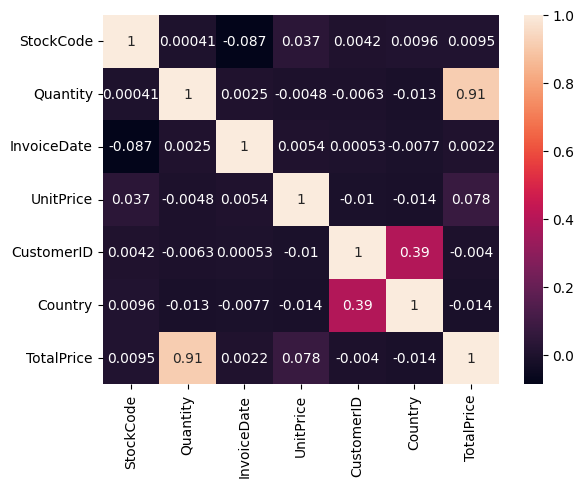

In [26]:
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [27]:
cleaned_data

,CustomerID,InvoiceDate,Quantity,TotalPrice,Country
372,12820.0,2,722,942.34,35
373,12821.0,213,70,92.72,35
374,12822.0,69,550,948.88,35
375,12823.0,73,230,1759.50,35
376,12824.0,58,232,397.12,35
...,...,...,...,...,...
4334,18280.0,276,45,180.60,35
4335,18281.0,179,54,80.82,35
4336,18282.0,6,103,178.05,35
4337,18283.0,2,1357,2045.53,35


In [28]:
print(customer_data.isnull().sum())

CustomerID     0
InvoiceDate    0
Quantity       0
TotalPrice     0
Country        0
dtype: int64


# Customer Segmentation by Neural Networks

In [29]:
X=cleaned_data.drop(['CustomerID'],axis=1)
y=cleaned_data['CustomerID']
y.head()

372    12820.0
373    12821.0
374    12822.0
375    12823.0
376    12824.0
Name: CustomerID, dtype: float64

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [31]:
X_train=X_train.astype(np.float32)
X_test=X_test.astype(np.float32)

In [33]:
cleaned_data=cleaned_data.astype(np.float32)

In [38]:
from keras.layers import Input, Dense
from keras.models import Model


input_layer = Input(shape=(4,))
encoded = Dense(4, activation='relu')(input_layer)
decoded = Dense(4, activation='sigmoid')(encoded)

autoencoder = Model(input_layer,decoded)
autoencoder.compile(optimizer='sgd', loss='mse')


In [39]:
autoencoder.fit(X,y, epochs=100, batch_size=256, shuffle=True, validation_split=0.3)

Epoch 1/100

10/10 [==============================] - 1s 42ms/step - loss: 218798992.0000 - val_loss: 305159680.0000
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: 218797152.0000 - val_loss: 305159680.0000
Epoch 3/100
10/10 [==============================] - 0s 13ms/step - loss: 218797152.0000 - val_loss: 305159680.0000
Epoch 4/100
10/10 [==============================] - 0s 14ms/step - loss: 218797136.0000 - val_loss: 305159680.0000
Epoch 5/100
10/10 [==============================] - 0s 13ms/step - loss: 218797152.0000 - val_loss: 305159680.0000
Epoch 6/100
10/10 [==============================] - 0s 12ms/step - loss: 218797152.0000 - val_loss: 305159680.0000
Epoch 7/100
10/10 [==============================] - 0s 12ms/step - loss: 218797152.0000 - val_loss: 305159680.0000
Epoch 8/100
10/10 [==============================] - 0s 11ms/step - loss: 218797136.0000 - val_loss: 305159680.0000
Epoch 9/100
10/10 [==============================] - 0s 13ms/step - los

In [41]:
encoder = Model(input_layer, encoded)

In [42]:
compressed_data = encoder.predict(X)

106/106 [==============================] - 0s 2ms/step


In [43]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(compressed_data)

In [44]:
cleaned_data['Segment'] = clusters

for cluster in np.unique(clusters):
    print(f"Cluster {cluster}:")
    print(cleaned_data[cleaned_data['Segment'] == cluster].describe())

Cluster 0:
         CustomerID  InvoiceDate     Quantity   TotalPrice  Country  Segment
count    859.000000   859.000000   859.000000   859.000000    859.0    859.0
mean   15445.084961    57.387661   769.078003  1267.280029     35.0      0.0
std     1514.253174    63.970264   325.113342   329.006744      0.0      0.0
min    12820.000000    -1.000000     1.000000   343.230011     35.0      0.0
25%    14213.000000    14.000000   533.000000   993.359985     35.0      0.0
50%    15444.000000    31.000000   725.000000  1220.770020     35.0      0.0
75%    16722.500000    78.000000   944.500000  1520.000000     35.0      0.0
max    18263.000000   315.000000  2100.000000  2073.429932     35.0      0.0
Cluster 1:
         CustomerID  InvoiceDate     Quantity   TotalPrice  Country  Segment
count   2129.000000  2129.000000  2129.000000  2129.000000   2129.0   2129.0
mean   15615.222656   110.233444   221.816818   369.604156     35.0      1.0
std     1582.962402    95.632263   165.864532   210.26

# EDA after Segmentation

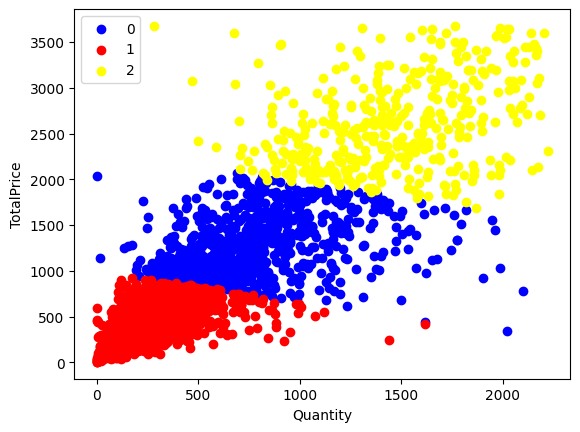

In [45]:
segment1 = cleaned_data[cleaned_data['Segment'] == 0]
segment2 = cleaned_data[cleaned_data['Segment'] == 1]
segment3 = cleaned_data[cleaned_data['Segment'] == 2]
# segment4 = cleaned_data[cleaned_data['Segment'] == 3]
plt.scatter(x=segment1['Quantity'], y=segment1['TotalPrice'], label=0, color='blue')
plt.scatter(x=segment2['Quantity'], y=segment2['TotalPrice'], label=1, color='red')
plt.scatter(x=segment3['Quantity'], y=segment3['TotalPrice'], label=2, color='yellow')
# plt.scatter(x=segment4['Quantity'], y=segment4['TotalPrice'], label=3, color='green')
plt.xlabel('Quantity')
plt.ylabel('TotalPrice')
plt.legend()

plt.show()

In [46]:
customer_seg = cleaned_data[['Segment','InvoiceDate','Quantity','TotalPrice']].groupby('Segment').agg(['count','mean','max','sum'])
customer_seg

InvoiceDate                              Quantity               \
              count        mean    max       sum    count         mean   
Segment                                                                  
0               859   57.387661  315.0   49296.0      859   769.078003   
1              2129  110.233444  325.0  234687.0     2129   221.816818   
2               398   36.864323  305.0   14672.0      398  1449.625610   

                          TotalPrice                                          
            max       sum      count         mean          max           sum  
Segment                                                                       
0        2100.0  660638.0        859  1267.280151  2073.429932  1.088594e+06  
1        1618.0  472248.0       2129   369.604156   920.099976  7.868872e+05  
2        2221.0  576951.0        398  2590.524414  3677.020020  1.031029e+06

In [59]:
customer_seg.sort_values(by=('TotalPrice','sum'), ascending=False)

InvoiceDate                              Quantity               \
              count        mean    max       sum    count         mean   
Segment                                                                  
0               859   57.387661  315.0   49296.0      859   769.078003   
2               398   36.864323  305.0   14672.0      398  1449.625610   
1              2129  110.233444  325.0  234687.0     2129   221.816818   

                          TotalPrice                                          
            max       sum      count         mean          max           sum  
Segment                                                                       
0        2100.0  660638.0        859  1267.280151  2073.429932  1.088594e+06  
2        2221.0  576951.0        398  2590.524414  3677.020020  1.031029e+06  
1        1618.0  472248.0       2129   369.604156   920.099976  7.868872e+05

In [54]:
customer_seg['TotalPrice']['sum'][2],customer_seg['TotalPrice']['sum'][0],customer_seg['TotalPrice']['sum'][1]

(1031028.7, 1088593.6, 786887.25)

In [47]:
cleaned_data[cleaned_data['Segment'] == cluster].describe()

,CustomerID,InvoiceDate,Quantity,TotalPrice,Country,Segment
count,398.000000,398.000000,398.000000,398.000000,398.0,398.0
mean,15557.841797,36.864323,1449.625610,2590.524414,35.0,2.0
std,1604.941162,44.351723,382.827728,491.625916,0.0,0.0
min,12836.000000,-1.000000,284.000000,1685.459961,35.0,2.0
25%,14222.250000,7.000000,1163.750000,2163.219971,35.0,2.0
50%,15529.000000,23.000000,1437.500000,2520.140015,35.0,2.0
75%,17041.250000,51.000000,1748.500000,2961.844971,35.0,2.0
max,18287.000000,305.000000,2221.000000,3677.020020,35.0,2.0


# Conclusions
## segment 1 are 63% of all customers & 28% of all quantity & 28% of all profits
## segment 0 are 25% of all customers & 38% of all quantity & 37% of all profits
## segment 2 are 12% of all customers & 34% of all quantity & 35% of all profits
